In [3]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/train"))


['cat.2165.jpg', 'cat.11290.jpg', 'cat.11746.jpg', 'cat.1596.jpg', 'cat.7612.jpg', 'dog.11816.jpg', 'dog.2266.jpg', 'dog.1368.jpg', 'dog.2560.jpg', 'cat.8953.jpg', 'dog.3468.jpg', 'cat.1543.jpg', 'dog.2142.jpg', 'cat.6620.jpg', 'dog.253.jpg', 'cat.11712.jpg', 'dog.11998.jpg', 'dog.6229.jpg', 'cat.9708.jpg', 'cat.2486.jpg', 'dog.1417.jpg', 'dog.6784.jpg', 'dog.6707.jpg', 'cat.6534.jpg', 'dog.11546.jpg', 'cat.2463.jpg', 'cat.9984.jpg', 'dog.10241.jpg', 'cat.4112.jpg', 'cat.2907.jpg', 'cat.1497.jpg', 'dog.3946.jpg', 'dog.10741.jpg', 'dog.665.jpg', 'dog.10914.jpg', 'cat.10293.jpg', 'dog.10393.jpg', 'dog.7583.jpg', 'cat.10522.jpg', 'cat.5418.jpg', 'cat.3566.jpg', 'dog.10237.jpg', 'cat.8742.jpg', 'cat.2343.jpg', 'dog.4523.jpg', 'cat.1113.jpg', 'dog.3062.jpg', 'cat.5460.jpg', 'dog.2591.jpg', 'dog.7367.jpg', 'dog.4977.jpg', 'cat.11094.jpg', 'cat.6813.jpg', 'cat.2952.jpg', 'cat.4734.jpg', 'dog.6895.jpg', 'dog.397.jpg', 'dog.3229.jpg', 'dog.8480.jpg', 'cat.6437.jpg', 'dog.9150.jpg', 'dog.1839.jp

In [4]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
filenames = os.listdir("/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


In [6]:
df.head()

,filename,category
0,cat.2165.jpg,cat
1,cat.11290.jpg,cat
2,cat.11746.jpg,cat
3,cat.1596.jpg,cat
4,cat.7612.jpg,cat


In [7]:
df.tail()

,filename,category
24995,dog.11130.jpg,dog
24996,cat.4936.jpg,cat
24997,dog.4844.jpg,dog
24998,dog.2653.jpg,dog
24999,dog.10177.jpg,dog


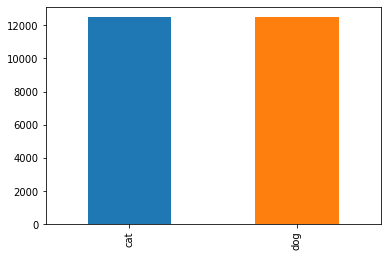

In [8]:


df['category'].value_counts().plot.bar()



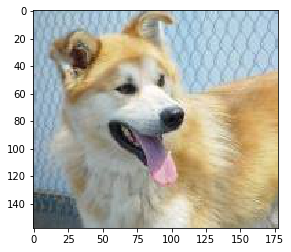

In [9]:
sample = random.choice(filenames)
image = load_img("/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/train/"+sample)
plt.imshow(image)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
________________________________________________

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [15]:
earlystop = EarlyStopping(patience=10)

In [16]:


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



In [17]:


callbacks = [earlystop, learning_rate_reduction]



In [18]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 


In [19]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

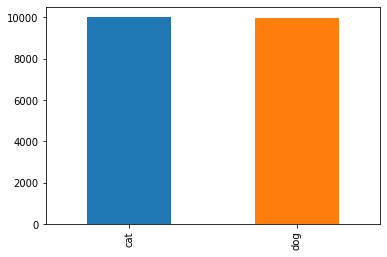

In [20]:


train_df['category'].value_counts().plot.bar()



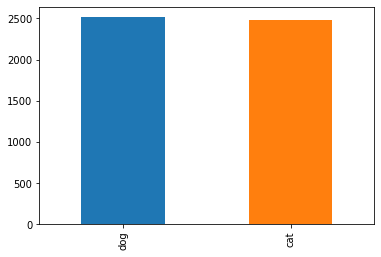

In [21]:
validate_df['category'].value_counts().plot.bar()

In [22]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 20000 images belonging to 2 classes.


In [24]:


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)



Found 5000 images belonging to 2 classes.


In [25]:


example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)



Found 1 images belonging to 1 classes.


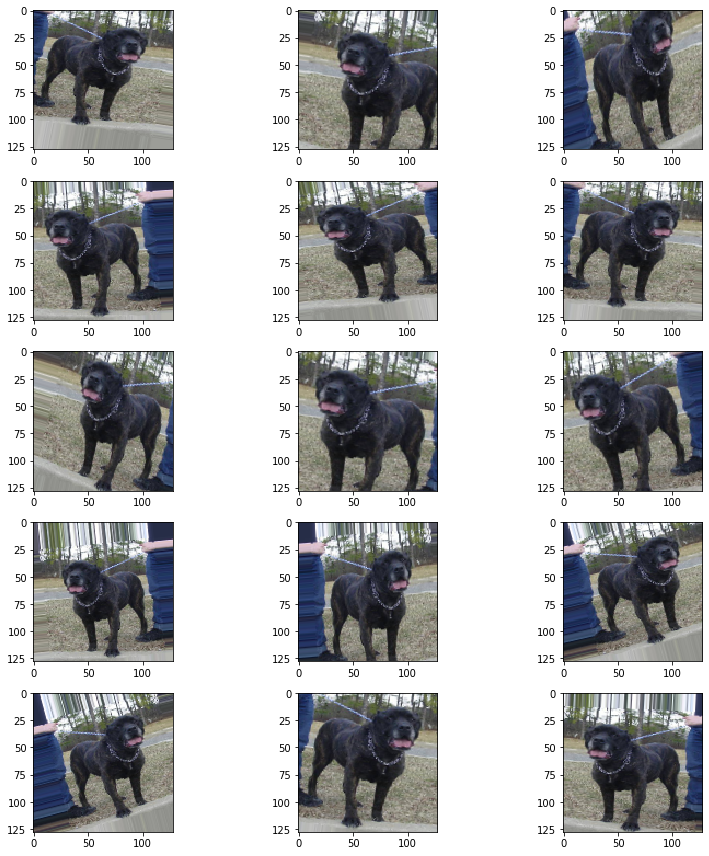

In [26]:


plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()



In [ ]:


epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)



Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 439/1333 [========>.....................] - ETA: 16:29 - loss: 0.9517 - accuracy: 0.5838

In [ ]:
model.save_weights("dogvscatmodel.h5")#if any error rename it to model.h5

In [ ]:


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()



In [ ]:


test_filenames = os.listdir("/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/test1/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]



In [ ]:



test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)






In [ ]:


predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))



In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)


In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 'dog', 'cat': 'cat' })


In [ ]:


test_df['category'].value_counts().plot.bar()



In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/home/ravisankar/Desktop/DesktopFiles/python_ML/dogs-vs-cats/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()
